## ***Getting the dataset***

In [12]:
import tensorflow as tf

In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-04-16 09:49:03--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.07s   

2023-04-16 09:49:03 (79.2 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [4]:
import json

with open("./sarcasm.json" , 'r') as f:
    datastore = json.load(f)

# Initialise the lists
sentences = []
labels = []

# Collect the sentences and labels from datastore
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

## ***Initialising the HyperParameters***

In [26]:
training_size = 20000
vocab_size = 5000
max_len = 32
embedding_dim = 32

## ***Split the dataset***

In [27]:
# Split the sentences
train_sentence = sentences[ : training_size]
test_sentence = sentences[training_size : ]

# Split the labels
train_labels = labels[ : training_size]
test_labels = labels[training_size : ]

## ***Tokenizing the sentences***

In [28]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size , oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentence)
train_sentence = tokenizer.texts_to_sequences(train_sentence)
train_sentence = pad_sequences(train_sentence , truncating = trunc_type, maxlen = max_len)
test_sentence = tokenizer.texts_to_sequences(test_sentence)
test_sentence = pad_sequences(test_sentence , truncating = trunc_type, maxlen = max_len)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## ***Creating the model***

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size , embedding_dim , input_length = max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

In [30]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

## ***Training the model***

In [31]:
nepoch = 15
r = model.fit(train_sentence , train_labels , epochs = nepoch , validation_data = (test_sentence , test_labels))

Epoch 1/15
625/625 [==============================] - 4s 5ms/step - loss: 0.5918 - accuracy: 0.6707 - val_loss: 0.4313 - val_accuracy: 0.8301
Epoch 2/15
625/625 [==============================] - 3s 5ms/step - loss: 0.3489 - accuracy: 0.8590 - val_loss: 0.3575 - val_accuracy: 0.8475
Epoch 3/15
625/625 [==============================] - 3s 5ms/step - loss: 0.2806 - accuracy: 0.8868 - val_loss: 0.3572 - val_accuracy: 0.8442
Epoch 4/15
625/625 [==============================] - 4s 7ms/step - loss: 0.2471 - accuracy: 0.8985 - val_loss: 0.3655 - val_accuracy: 0.8433
Epoch 5/15
625/625 [==============================] - 3s 5ms/step - loss: 0.2256 - accuracy: 0.9080 - val_loss: 0.3740 - val_accuracy: 0.8445
Epoch 6/15
625/625 [==============================] - 3s 5ms/step - loss: 0.2096 - accuracy: 0.9150 - val_loss: 0.3894 - val_accuracy: 0.8411
Epoch 7/15
625/625 [==============================] - 3s 5ms/step - loss: 0.1974 - accuracy: 0.9201 - val_loss: 0.4087 - val_accuracy: 0.8386
Epoch 

## ***Visualizing the training and validation losses***

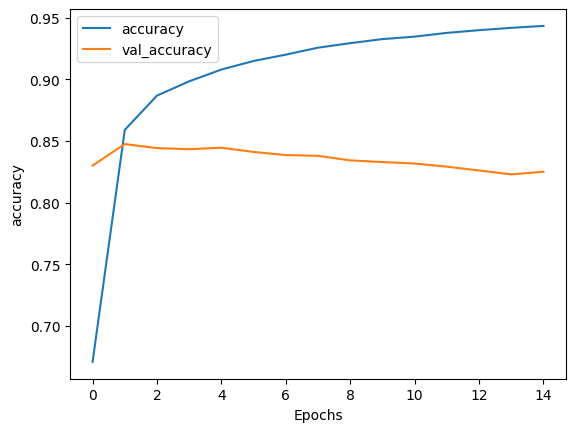

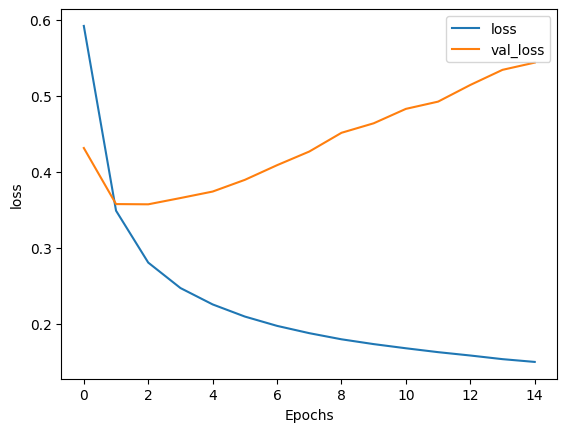

In [33]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(r, "accuracy")
plot_graphs(r, "loss")

## ***Visualizing the word embeddings***

In [34]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 

(5000, 32)


In [35]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

In [37]:
# Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

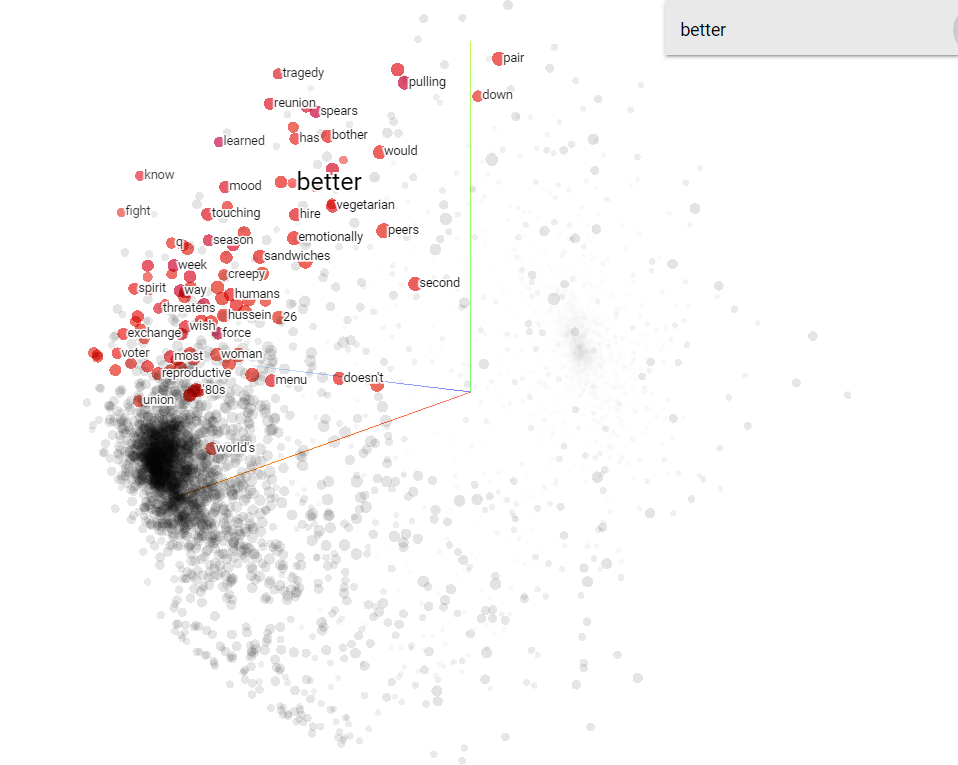